In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py

In [2]:
%matplotlib inline

In [3]:
# Import data and create df

data = pd.read_csv("/Users/Stacy/Documents/WebDevelopment/projects/sexualAssault_datasets/2010-2018_sexcrimes_violentcrimes.csv", index_col="CAD Event Number")
data = pd.DataFrame(data)
data.head()

,Event Clearance Description,Call Type,Priority,Initial Call Type,Final Call Type,Original Time Queued,Arrived Time,Precinct,Sector,Beat
CAD Event Number,,,,,,,,,,
2010000066820,ASSISTANCE RENDERED,911,2,MENTAL - PERSON OR PICKUP/TRANSPORT,--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,02/27/2010 10:54:25 PM,Feb 27 2010 10:55:45:000PM,NORTH,UNION,U1
2010000000327,PHYSICAL ARREST MADE,911,1,ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS),--ASSAULTS - FIREARM INVOLVED,01/01/2010 03:13:06 AM,Jan 1 2010 03:14:51:000AM,SOUTH,ROBERT,R3
2010000000451,REPORT WRITTEN (NO ARREST),911,2,THEFT OF SERVICES,--ROBBERY - ARMED,01/01/2010 05:46:54 AM,Jan 1 2010 06:39:35:000AM,NORTH,UNION,U1
2010000000466,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),01/01/2010 06:28:49 AM,Jan 1 2010 06:40:09:000AM,EAST,GEORGE,G1
2010000000776,REPORT WRITTEN (NO ARREST),911,3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),01/01/2010 03:05:57 PM,Jan 1 2010 03:12:26:000PM,SOUTHWEST,FRANK,F3


In [4]:
# Rename columns to be pythonic

data.columns = ['event_clearing', 'call_type', 'priority', 
                'initial_call_type', 'final_call_type', 'original_time_queued',
               'arrived_time', 'precinct', 'sector', 'beat']

data.head()

,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat
CAD Event Number,,,,,,,,,,
2010000066820,ASSISTANCE RENDERED,911,2,MENTAL - PERSON OR PICKUP/TRANSPORT,--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,02/27/2010 10:54:25 PM,Feb 27 2010 10:55:45:000PM,NORTH,UNION,U1
2010000000327,PHYSICAL ARREST MADE,911,1,ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS),--ASSAULTS - FIREARM INVOLVED,01/01/2010 03:13:06 AM,Jan 1 2010 03:14:51:000AM,SOUTH,ROBERT,R3
2010000000451,REPORT WRITTEN (NO ARREST),911,2,THEFT OF SERVICES,--ROBBERY - ARMED,01/01/2010 05:46:54 AM,Jan 1 2010 06:39:35:000AM,NORTH,UNION,U1
2010000000466,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),01/01/2010 06:28:49 AM,Jan 1 2010 06:40:09:000AM,EAST,GEORGE,G1
2010000000776,REPORT WRITTEN (NO ARREST),911,3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),01/01/2010 03:05:57 PM,Jan 1 2010 03:12:26:000PM,SOUTHWEST,FRANK,F3


In [5]:
# ID all calls cancelled by dispatch
cancelled_calls = data[data.event_clearing.str.contains("CANCELLED")]

# Delete rows with cxl'd calls

data = data[data.event_clearing != 'RESPONDING UNIT(S) CANCELLED BY RADIO']
data = data[data.event_clearing != 'DUPLICATED OR CANCELLED BY RADIO']


In [6]:
# Change original_time_queued to datetime
data['original_time_queued'] = pd.to_datetime(data.original_time_queued)

# Change arrived_time to datetime
data['arrived_time'] = pd.to_datetime(data.arrived_time, format='%b %d %Y %I:%M:%S:%f%p')

# Add time delta between original_time_queued and arrived_time
data['time_delta'] = (data.arrived_time - data.original_time_queued)/np.timedelta64(1, 's')

In [7]:
# Add columns for arrived year and month

data['year'] = data.arrived_time.dt.year
data['month'] = data.arrived_time.dt.month

In [8]:
# For rows with bad arrived time: change month and year to original_time_queued
# Where arrive_time year = 1900, change data.year and data.month to original_time_queued year

mask = data.year < 1901
column_name_year = 'year'
column_name_month = 'month'
data.loc[mask, column_name_year] = data.original_time_queued.dt.year
data.loc[mask, column_name_month] = data.original_time_queued.dt.month


data.year.value_counts()

2018    2827
2016    2624
2017    2543
2015    2491
2014    2170
2012    2162
2013    2159
2011    2118
2010    2010
Name: year, dtype: int64

In [9]:
call_types = data['final_call_type'].unique().tolist()
call_types

['--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT',
 '--ASSAULTS - FIREARM INVOLVED',
 '--ROBBERY - ARMED',
 '--RAPE - KNOWN SUSPECT (ACQUAINTANCE)',
 '--RAPE - UNKNOWN SUSPECT (STRANGER)',
 '--HOMICIDE',
 '--SEX OFFENSES (RAPE) - MOLESTING',
 '--KIDNAP - GENERAL',
 '--DRIVE BY SHOOTING - NO INJURIES',
 '--COMMERCIAL SEXUAL EXPLOITATION OF MINORS (CSEC)']

In [10]:
# Define terms that id rape CFS
rape_terms = 'STRANGER|ACQUAINTANCE'
rape_call_types = [
    '--RAPE - KNOWN SUSPECT (ACQUAINTANCE)',
    '--RAPE - UNKNOWN SUSPECT (STRANGER)']

rape_call_types

['--RAPE - KNOWN SUSPECT (ACQUAINTANCE)',
 '--RAPE - UNKNOWN SUSPECT (STRANGER)']

In [11]:
# Define terms that id other violent crimes
violent_crime_call_types = [
    '--ASSAULTS - FIREARM INVOLVED',
    '--ROBBERY - ARMED',
    '--HOMICIDE',
    '--KIDNAP - GENERAL',
    '--DRIVE BY SHOOTING - NO INJURIES']

violent_crime_call_types

['--ASSAULTS - FIREARM INVOLVED',
 '--ROBBERY - ARMED',
 '--HOMICIDE',
 '--KIDNAP - GENERAL',
 '--DRIVE BY SHOOTING - NO INJURIES']

In [12]:
# ID all clearing codes
clearing_codes = data['event_clearing'].unique().tolist()
clearing_codes

['ASSISTANCE RENDERED',
 'PHYSICAL ARREST MADE',
 'REPORT WRITTEN (NO ARREST)',
 'FOLLOW-UP REPORT MADE',
 'UNABLE TO LOCATE INCIDENT OR COMPLAINANT',
 'OTHER REPORT MADE',
 'Evidence Submitted (new incident number required)',
 'ORAL WARNING GIVEN',
 'RADIO BROADCAST AND CLEAR',
 'NO POLICE ACTION POSSIBLE OR NECESSARY',
 'EXTRA UNIT',
 'CITATION ISSUED (CRIMINAL OR NON-CRIMINAL)',
 'INCIDENT LOCATED, PUBLIC ORDER RESTORED',
 'NON-CRIMINAL REFERRAL',
 'FALSE COMPLAINT/UNFOUNDED',
 'STREET CHECK WRITTEN',
 'PROBLEM SOLVING PROJECT',
 'Citations – Criminal Citation Issued (new incident number required)',
 '(NOT CURRENTLY USED) ALARM NO RESPONSE',
 'TRANSPORTATION OR ESCORT PROVIDED',
 'NO SUCH ADDRESS OR LOCATION']

In [19]:
# ID arrest clearing codes

arrest_cc = ['PHYSICAL ARREST MADE']

In [23]:
# Add column identifying if there was an arrest

data['is_arrest'] = np.where(data['event_clearing'].isin(arrest_cc), 'yes', 'no')

In [24]:
# Add column identifying crime type
data['crime_type'] = np.where(data['final_call_type'].isin(rape_call_types), 'rape', 'violent crime')

data.head()

,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat,time_delta,year,month,is_arrest,crime_type
CAD Event Number,,,,,,,,,,,,,,,
2010000066820,ASSISTANCE RENDERED,911,2,MENTAL - PERSON OR PICKUP/TRANSPORT,--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,2010-02-27 22:54:25,2010-02-27 22:55:45,NORTH,UNION,U1,80.0,2010,2,no,violent crime
2010000000327,PHYSICAL ARREST MADE,911,1,ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS),--ASSAULTS - FIREARM INVOLVED,2010-01-01 03:13:06,2010-01-01 03:14:51,SOUTH,ROBERT,R3,105.0,2010,1,yes,violent crime
2010000000451,REPORT WRITTEN (NO ARREST),911,2,THEFT OF SERVICES,--ROBBERY - ARMED,2010-01-01 05:46:54,2010-01-01 06:39:35,NORTH,UNION,U1,3161.0,2010,1,no,violent crime
2010000000466,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2010-01-01 06:28:49,2010-01-01 06:40:09,EAST,GEORGE,G1,680.0,2010,1,no,rape
2010000000776,REPORT WRITTEN (NO ARREST),911,3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2010-01-01 15:05:57,2010-01-01 15:12:26,SOUTHWEST,FRANK,F3,389.0,2010,1,no,rape


In [116]:
#rape_arrest_percentage.plot.bar()

#data['crime_type'].groupby(data.final_call_type).sum().plot(kind='bar')
#is_rape_arrest.groupby("event_clearing").size() * 100 / data['is_rape'].sum().plot.bar()
plt.plot(x=data.year, y=data.is_rape)
#plt.show()

TypeError: Empty 'DataFrame': no numeric data to plot

In [99]:
# Define rape CFS that resulted in an arrest
is_rape_arrest = data[data['is_rape'] & data['is_arrest']]

# Calc % of rape CFS that resulted in arrest
rape_arrest_percentage = is_rape_arrest.groupby("event_clearing").size() * 100 / data['is_rape'].sum()

is_rape_arrest
#rape_arrest_percentage



TypeError: unsupported operand type(s) for &: 'str' and 'bool'

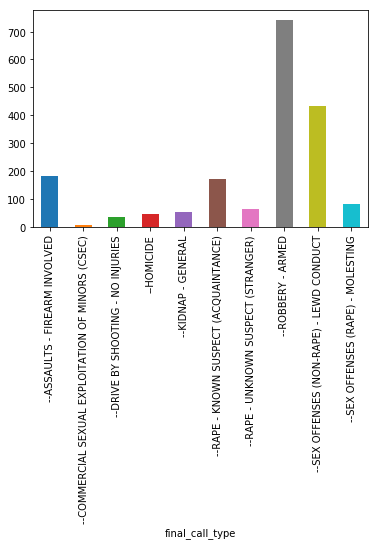

In [64]:
#rape_arrest_percentage.plot.bar()

data['is_arrest'].groupby(data.final_call_type).sum().plot(kind='bar')
#is_rape_arrest.groupby("event_clearing").size() * 100 / data['is_rape'].sum().plot.bar()
#plt.plot(x=data.year, y=data.is_rape)
#plt.show()

In [26]:


data_percent = pd.crosstab(data.crime_type,data.is_arrest,
                          normalize = 'index').rename_axis(None)


# Multiply all percentages by 100 for graphing. 
data_percent *= 100



data_percent


is_arrest,no,yes
rape,93.751655,6.248345
violent crime,90.846656,9.153344


In [25]:


# Plot only arrests as bar graph. 
    #plt.bar(data_percent.index, data_percent.is_arrest, align='center', alpha=0.5)

#plt.bar(df_percent.index, df_percent.Y, align='center', alpha=0.5)
#plt.ylabel('Loan Approval Percentage')
#plt.title('Area Wise Loan Approval Percentage')

    #plt.show()

# Plot only approvals as bar graph. 
plt.bar(data_percent.index, data_percent.is_arrest, align='center', alpha=0.5)
#plt.ylabel('Loan Approval Percentage')
#plt.title('Area Wise Loan Approval Percentage')

plt.show()

NameError: name 'data_percent' is not defined

In [76]:
data_percent

is_arrest,False,True
--ASSAULTS - FIREARM INVOLVED,88.855055,11.144945
--COMMERCIAL SEXUAL EXPLOITATION OF MINORS (CSEC),88.461538,11.538462
--DRIVE BY SHOOTING - NO INJURIES,96.675416,3.324584
--HOMICIDE,93.023256,6.976744
--KIDNAP - GENERAL,73.232323,26.767677
--RAPE - KNOWN SUSPECT (ACQUAINTANCE),92.529489,7.470511
--RAPE - UNKNOWN SUSPECT (STRANGER),95.631720,4.368280
--ROBBERY - ARMED,87.385087,12.614913
--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,93.071042,6.928958
--SEX OFFENSES (RAPE) - MOLESTING,94.352617,5.647383


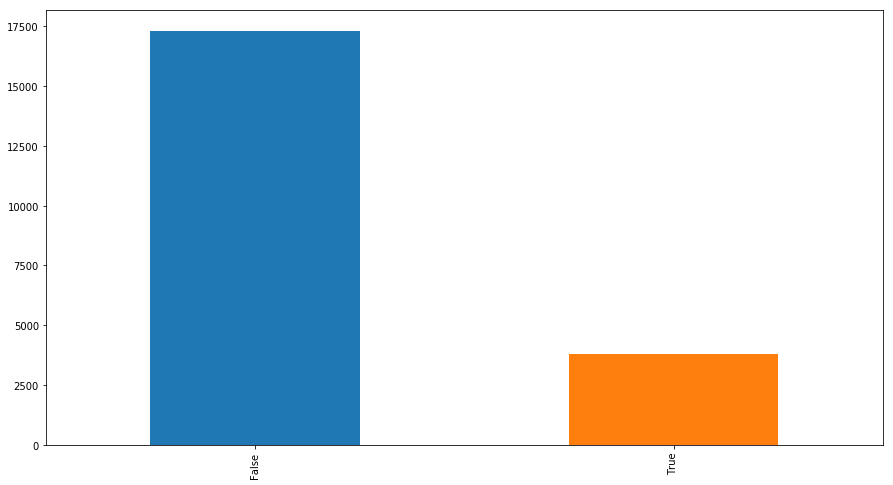

In [48]:
pd.value_counts(data.is_rape).plot.bar(figsize=(15,8))


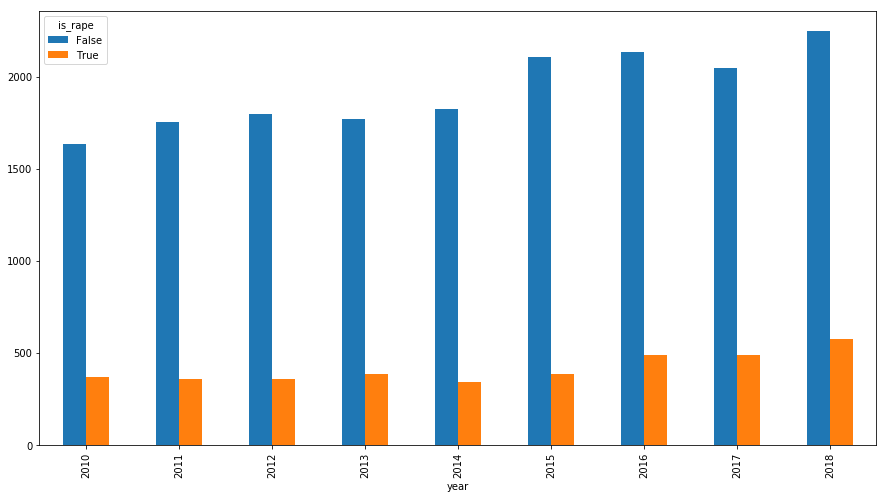

In [55]:
data.groupby('is_rape').year.value_counts().unstack(0).plot.bar(stacked=False, figsize=(15,8))


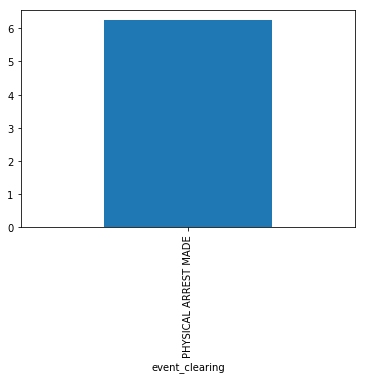

In [67]:
rape_arrest_percentage.plot.bar()